In [1]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
print("iris_dataset key: {}".format(iris_dataset.keys()))

iris_dataset key: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [2]:
#print(iris_dataset['data'])
print("shape of data:{}".format(iris_dataset['data'].shape))

shape of data:(150, 4)


In [3]:
print(iris_dataset['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
iris_dataset['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
iris_dataset['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
# Description
print(iris_dataset['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

사이킷런을 이용한 데이터 분리
- 학습 데이터와 평가 데이터가 따로 존재하지 않는 경우 데이터의 일부분을 평가 데이터로 사용해야 한다.


학습 데이터, 평가 데이터, 검증 데이터 총 3개의 데이터로 나누는 경우
- 학습 데이터로 모델을 학습시킨다.
- 학습된 모델로 검증 데이터를 사용해 모델 검증을 한다
- 그 결과를 통해 모델의 하이퍼 파라미터를 수정한다.
- 학습 & 검증을 반복하여 최종 모델로 평가 데이터를 평가한다.


In [9]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_label, test_label = train_test_split(iris_dataset['data'], iris_dataset['target'], test_size=0.25, random_state=42)

#### K-nearest neighbor classifier
- 데이터 특성이 맞는다면 좋은 결과를 확인할 수 있는 방법
- 예측하고자 하는 데이터에 대해 가장 가까운 거리에 있는 데이터의 라벨과 같다고 예측하는 방법

특징
- 데이터에 대한 가정이 없어 단순하다
- 다목적 분류와 회귀에 좋다
- 높은 메모리를 요구한다
- k값이 커지면 계산이 늦어질 수 있다
- 관련 없는 기능의 데이터의 규모에 민감하다


Saving k_algorithm.png to k_algorithm (1).png
User uploaded file "k_algorithm.png" with length 15396 bytes


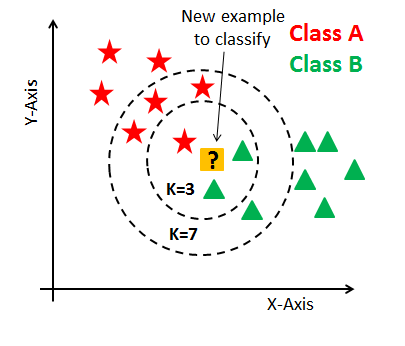

In [13]:
from google.colab import files
uploaded = files.upload() # 파일 업로드 기능 실행

for fn in uploaded.keys(): # 업로드된 파일 정보 출력
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
from IPython.display import Image
Image('k_algorithm.png')

In [15]:
from sklearn.neighbors import KNeighborsClassifier
# 분류기 생성 시 인자 값으로 n_neighbors 에 받는데 위의 K 값과 동일하다
knn = KNeighborsClassifier(n_neighbors=1)

# 학습데이터에 적용
knn.fit(train_input, train_label)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', 
                     metric_params=None, n_jobs=1, n_neighbors=1,
                     p=2, weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=1, n_neighbors=1, p=2,
                     weights='uniform')

In [16]:
import numpy as np
new_input = np.array([[6.1, 2.8, 4.7, 1.2]])
# 꽃받침 길이와 너비가 각각 6.1, 2.8이고
# 꽃잎의 길이와 너비가 각각 4.7, 1.2인 데이터로 구성되어있다.
# 리스트 안에 또 하나의 리스트가 포함되어있는 방식으로 해야한다
# 일반적으로 하나의 리스트로 하는 경우에는 오류가 발생

In [19]:
knn.predict(new_input)
# 예측결과 1(Versicolor) 로 예측하고 있다.

array([1])

In [21]:
# 평가 데이터를 사용해 모델의 성능을 측정한다.
predict_label = knn.predict(test_input)
predict_label

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [22]:
print('test accuracy {:.2f}'.format(np.mean(predict_label==test_label)))

test accuracy 1.00
